In [42]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import f1_score
from scipy import stats

import datetime as dt

import warnings
warnings.filterwarnings("ignore")

In [43]:
#importing the dataset
mobileUserData = pd.read_csv(os.path.join('D:\FlipRobo\Micro-Credit-Project\Micro Credit Project\Data file.csv'))
rowCount = 209593 #storing row count for data loss calculations

In [44]:
#pd.set_option('display.max_rows', None) 
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1) #this is to ensure all the rows/columns are displayed and not just first 5 and last 5

In [45]:
mobileUserData.head()

,slno,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-16
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-16
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-16
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-16
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-16


In [46]:
#Statistical Summary
mobileUserData.drop(['slno', 'msisdn', 'pcircle', 'pdate'], axis = 1).describe(include='all')

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,3737.355121,7704.501157,1812.817952,3851.927942,6.31543,7.716780,12396.218352,1864.595821,92.025541,262.578110,3749.494447,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,53643.625172,10139.621714,2070.864620,54006.374433,7.19347,12.590251,16857.793882,2081.680664,369.215658,4183.897978,53885.414979,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.00000,0.000000,0.000000,0.000000,-200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,0.000000,1540.000000,770.000000,11.000000,2.00000,0.000000,2317.000000,773.000000,14.600000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.000000,0.000000,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,999606.368100,810096.000000,55000.000000,999479.419300,336.00000,88.000000,953036.000000,55000.000000,41456.500000,99914.441420,999809.240100,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


From the above table we make the following observation:
<ol>
  <li>msisdn represents the mobile number of the user and therefore should be unique to each user. However, there are 1,86,243 unique rows out of 2,09,593 rows. Hence, there there might be duplicate rows in this dataset.</li>
  <li>Mean is larger then the 50th percentile and there is a huge difference between the 75th percentile and max value for most of the rows. This indicate presence of outliers.</li>
  <li>Minimum values of the columns are either zero or negative. However, based on the data description, having negative values is not logical for this dataset and hence need to be rectified.</li>
</ol>

<p>
    We will now futher investigate each of these points and try to solve them.
</p>

In [6]:
mobileUserData['duplicate'] = mobileUserData.duplicated(keep='first')
mobileUserData.duplicate.value_counts()

False    209593
Name: duplicate, dtype: int64

<p>The cell above creates a new column named 'duplicate' and stores a boolean value based on its uniqueness of the corresponding row. If a particular row has no duplicate, the duplicate column has the value 'false' for that row. We see that all the 2,09,593 rows have the values as 'false' and hence the possiblity of duplicate values are ruled out.</p>

In [7]:
#Dropping the duplicate column as it will not be required anymore
mobileUserData.drop('duplicate', axis=1, inplace=True)

In [8]:
mobileUserData.isnull().sum()

slno                    0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

There are no missing values in the dataset

In [9]:
mobileUserData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   slno                  209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

#### Observations from .info() results are summarised in the table below:
<br>

<table>
  <thead>
    <tr>
      <th style="text-align:center">Column Name</th>
      <th style="text-align:center">DataType</th>
      <th style="text-align:center">Comment</th>
    </tr>
   </thead>
   <tbody>
     <tr>
       <td style="text-align:center">msisdn</td>
       <td style="text-align:center">object</td>
       <td style="text-align:center">Should be int64. Needs further attention</td>
     </tr>
     <tr>
       <td style="text-align:center">pcircle</td>
       <td style="text-align:center">object</td>
       <td style="text-align:center">since it represents telecom circle and contains only 'UPW' for all the rows, a more approprite datatype would be string</td>
     </tr>
     <tr>
       <td style="text-align:center">pdate</td>
       <td style="text-align:center">object</td>
       <td style="text-align:center">the rows in this column contains dates, a more appropriate datatype will be DataTime</td>
     </tr>
       <tr>
       <td style="text-align:center">aon, last_rech_date_ma, last_rech_date_da</td>
       <td style="text-align:center">float64</td>
       <td style="text-align:center">Since it represents values in days, it should have been int64 unless the days with decimal values represent partial days. Have negative values as well. Need further attention for these columns.</td>
     </tr>
     <tr>
       <td style="text-align:center">fr_ma_rech30</td>
       <td style="text-align:center">float64</td>
       <td style="text-align:center">This column represents frequency and hence should not have float value. Need further attention.</td>
     </tr>
     <tr>
       <td style="text-align:center">fr_da_rech30</td>
       <td style="text-align:center">float64</td>
       <td style="text-align:center">This column represents frequency and hence should not have float value. Need further attention.</td>
     </tr>
     <tr>
       <td style="text-align:center">maxamnt_loans30</td>
       <td style="text-align:center">float64</td>
       <td style="text-align:center">Since only two loan amounts are there: Rs. 5 & 10. Should have been int64. Need further attention.</td>
     </tr>
     <tr>
       <td style="text-align:center">cnt_loans90</td>
       <td style="text-align:center">float64</td>
       <td style="text-align:center">Since it represents number of loans taken in last 90 days, should have been int64. Need further attention.</td>
     </tr>
  </tbody>
</table>
<p>
    Having identified these problems with the datatypes, let is deal with it. First, inspecting the data, we see that that msisdn has the letter 'I' in between after 5 digits from the right for all the rows. Further, the data sample file provided seperately doesn't have the letter 'I'. Therefore, it is safe to assume that this is a mistake that happened in the dataset and 'I' should not be a part of the mobile numbers. This is the cause for it being the wrong datatype for this column as well and removing "T" for the numbers should solve our problem.
</p> 
<p>
    After this, we will drop the column 'pcircle' column since it only represents which telecome cirlce the customer belongs to and is same for all the rows.
</p>
<p>
    Unless this is a time-series analysis, the column pdate does not contribute much to the analysis. However, it can be used to feature-engineer an additional column to represent the day of the week corresponding to the date in the pdate column. This will also ensure that there is no information loss once the column pdate is dropped and that the data from this column remains useful in the analysis even after its dropped
</p>
<p>
    For the remaining tables in the row, we will first handle the outliers to see if they are the reason behind the incorrect datatypes. For example, for column 'aon', it might be having float64 datatype because one outlier is in decimals causing the entire column to have float64 datatype.
</p>

In [10]:
#Removing pcircle, pdate, slno column
mobileUserData.drop(['pcircle', 'slno', 'pdate', 'msisdn'], axis = 1, inplace=True)

In [11]:
# numericColList = list(mobileUserData.columns)
# numericColList

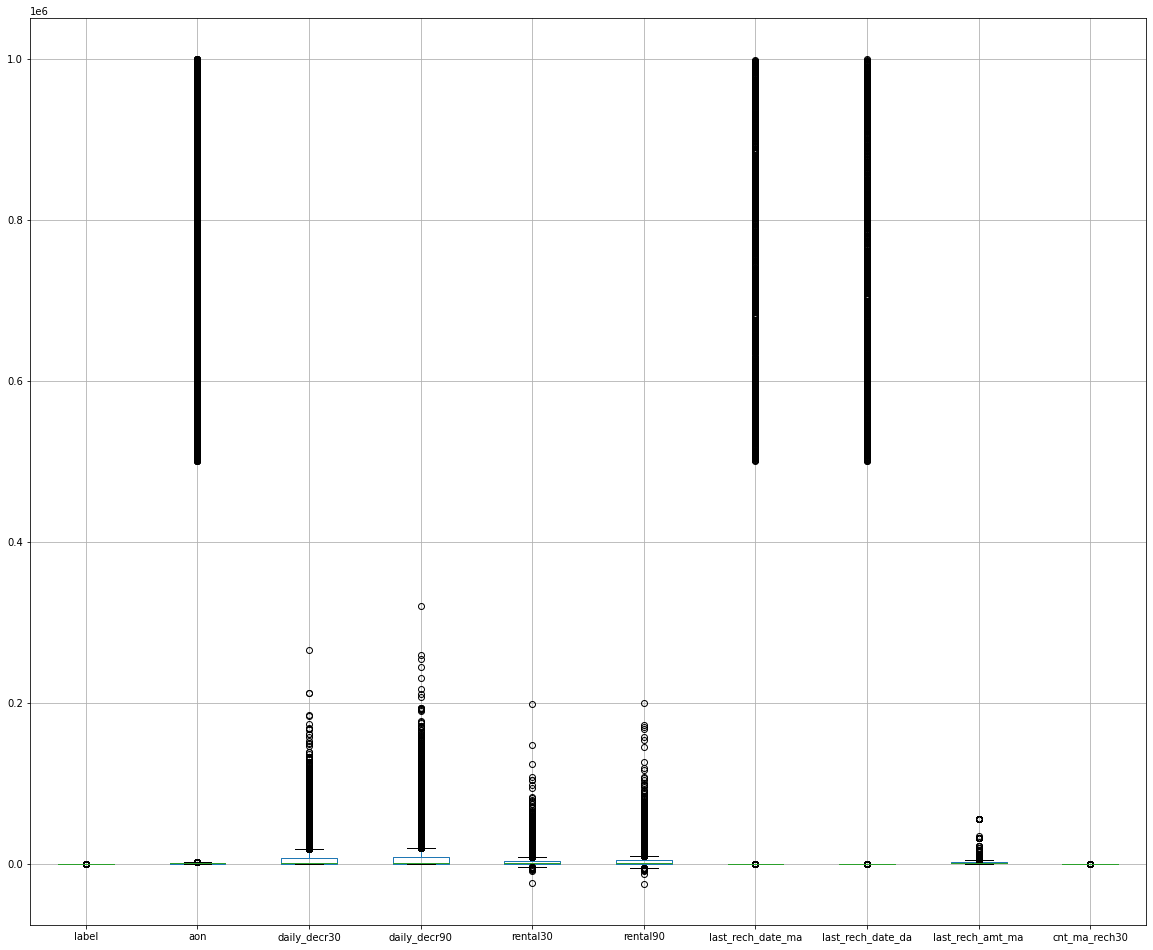

In [12]:
mobileUserData.iloc[:,0:10].boxplot(figsize=[20,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

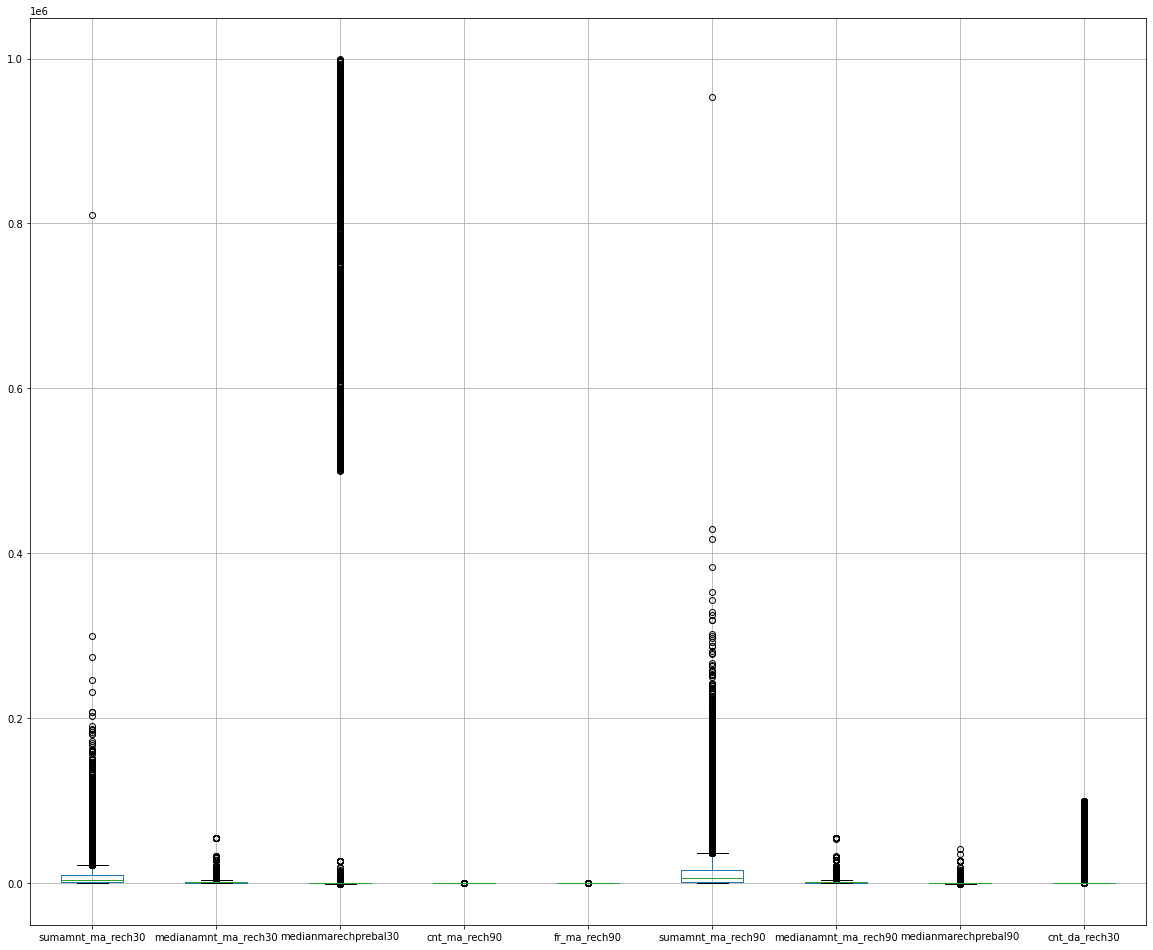

In [13]:
mobileUserData.iloc[:,11:20].boxplot(figsize=[20,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

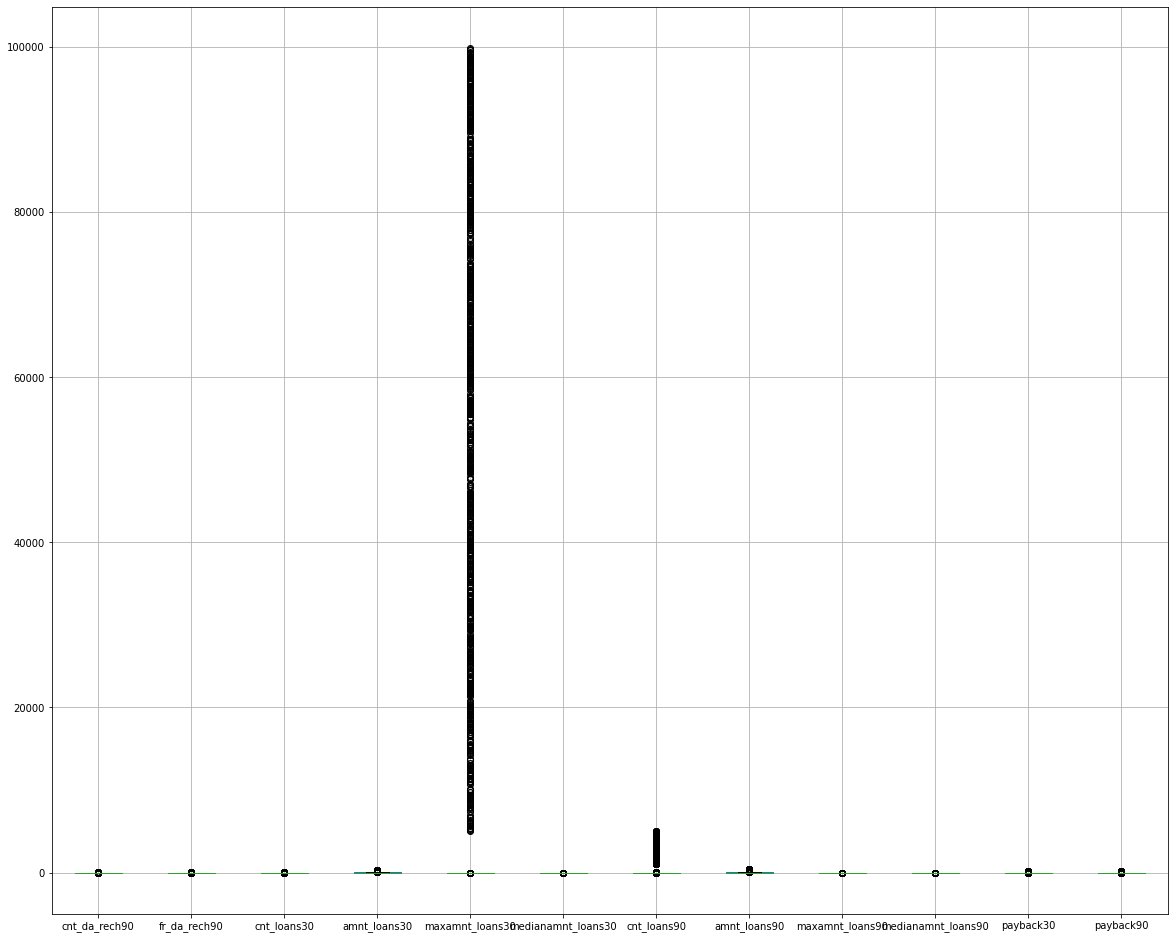

In [14]:
mobileUserData.iloc[:,21:].boxplot(figsize=[20,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

From the boxplots above we can see that there is a presence of very large outliers in the columns 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'cnt_da_rech30', 'maxamnt_loans30', and 'cnt_loans90'

In [15]:
outlierCols = ['aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30', 'fr_da_rech30','fr_ma_rech30', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'cnt_da_rech30', 'maxamnt_loans30', 'cnt_loans90']

In [16]:
mobileUserData[outlierCols].skew()

aon                     10.392949
daily_decr30            3.946230 
daily_decr90            4.252565 
rental30                4.521929 
rental90                4.437681 
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma        3.781149 
sumamnt_ma_rech30       6.386787 
medianamnt_ma_rech30    3.512324 
medianmarechprebal30    14.779875
fr_da_rech30            14.776430
fr_ma_rech30            14.772833
sumamnt_ma_rech90       4.897950 
medianamnt_ma_rech90    3.752706 
cnt_da_rech30           17.818364
maxamnt_loans30         17.658052
cnt_loans90             16.594408
dtype: float64

From the above output, we see that all the columns with outliers are also either left or right skewed. Therefore, we will use IQR-method to handle them.

In [17]:
def outlierRemoverS(data, col):
    '''Note: This function is for skewed data only'''
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    lowerBridge = data[col].quantile(0.25) - (1.5*IQR)
    upperBridge = data[col].quantile(0.75) + (1.5*IQR)
    if lowerBridge >=0:
            data.loc[data[col]>=upperBridge, col] = upperBridge
            data.loc[data[col]<=lowerBridge, col] = lowerBridge
    elif lowerBridge < 0:
            data.loc[data[col]>=upperBridge, col] = upperBridge
            data.loc[data[col]<=0, col] = data[col].quantile(0.5)

In [18]:
for index in range(0,16):
    outlierRemoverS(mobileUserData, outlierCols[index])

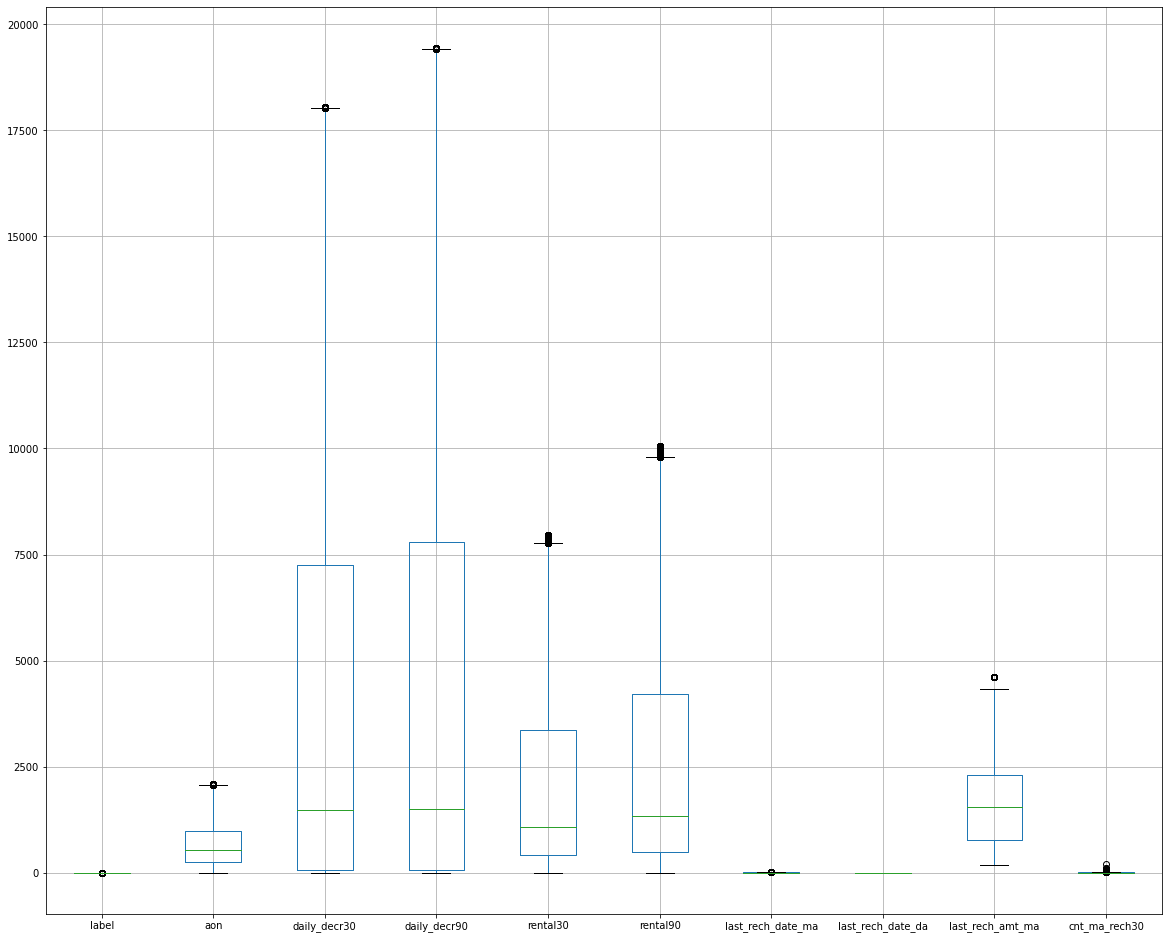

In [19]:
mobileUserData.iloc[:,0:10].boxplot(figsize=[20,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

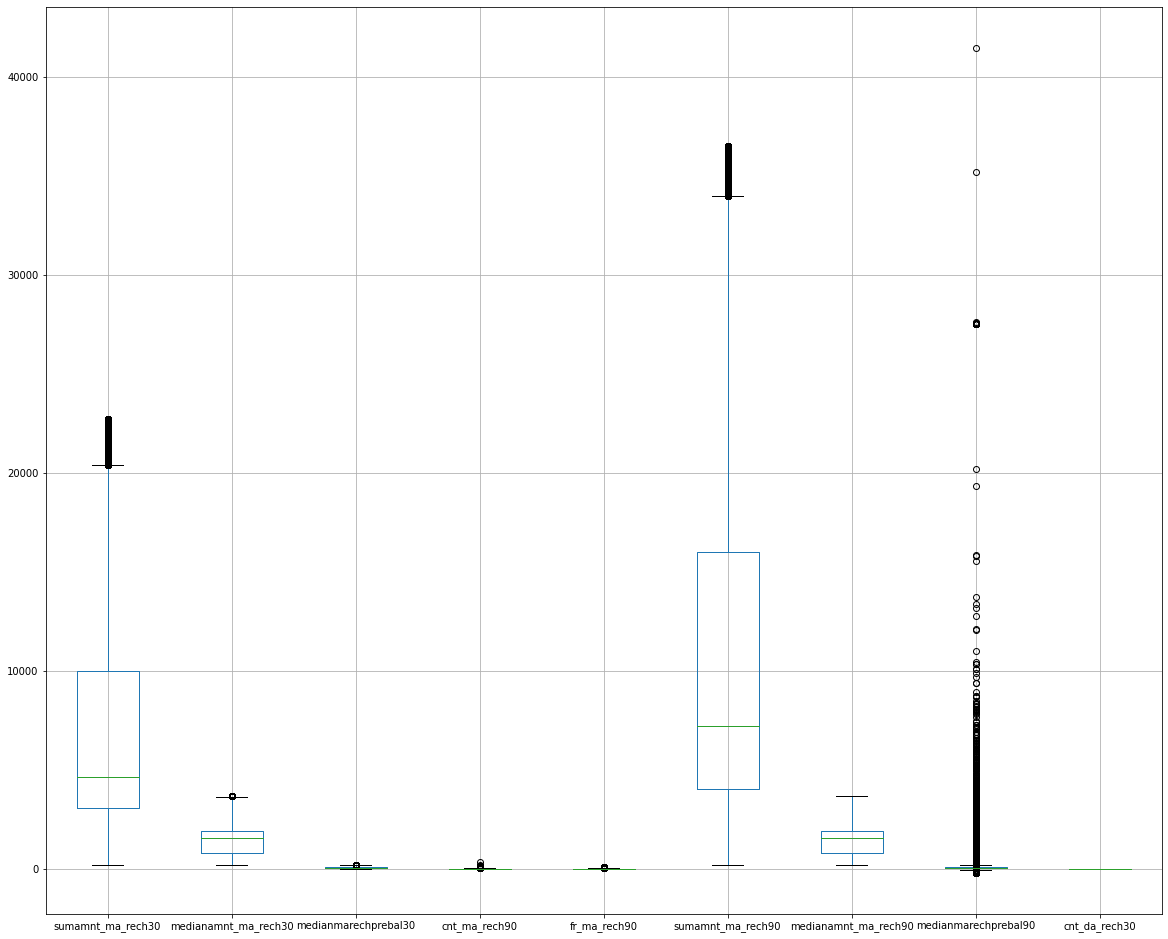

In [20]:
mobileUserData.iloc[:,11:20].boxplot(figsize=[20,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

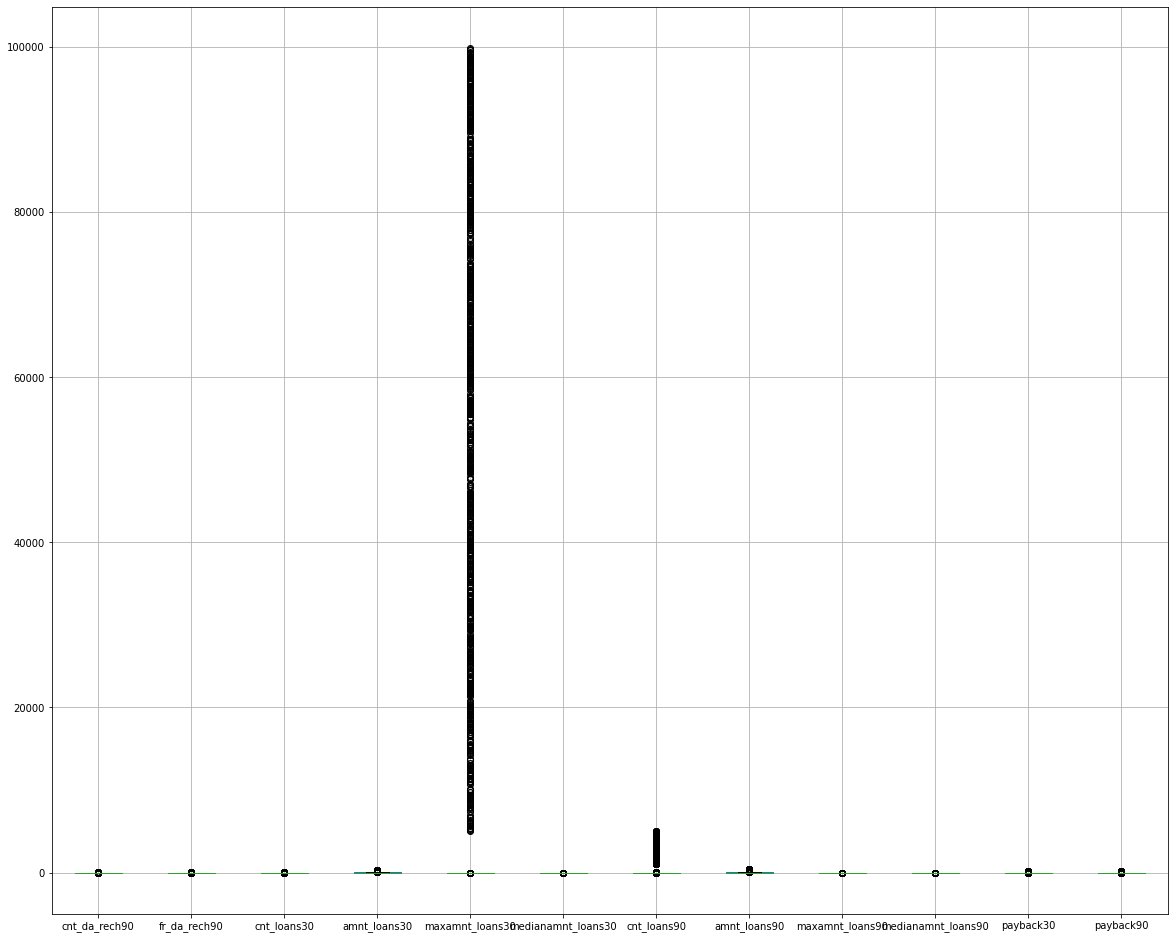

In [21]:
mobileUserData.iloc[:,21:].boxplot(figsize=[20,20])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [22]:
mobileUserData.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,209593.000000,209593.0,209593.0,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,672.508118,4510.058643,4897.515261,2276.437071,2863.764438,5.201739,0.0,1873.271269,3.978057,4.422858,7478.873102,1681.386177,64.165178,6.31543,7.716780,11600.999714,1670.893904,92.025541,0.0,0.0,0.041495,0.045712,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,510.744848,5832.455687,6411.079179,2494.082457,3182.520326,4.757758,0.0,1222.598958,4.256090,4.081796,6142.396173,912.475438,59.565287,7.19347,12.590251,10265.733679,928.220254,369.215658,0.0,0.0,0.397556,0.951386,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,1.000000,0.000667,0.000667,0.040000,0.040000,1.000000,0.0,173.000000,0.000000,1.000000,173.000000,173.000000,0.010000,0.00000,0.000000,173.000000,173.000000,-200.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,252.000000,53.500000,53.592000,415.740000,476.520000,2.000000,0.0,773.000000,1.000000,2.000000,3086.000000,773.000000,24.000000,2.00000,0.000000,4029.000000,773.000000,14.600000,0.0,0.0,0.000000,0.000000,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.0,1539.000000,3.000000,2.000000,4628.000000,1539.000000,33.900000,4.00000,2.000000,7226.000000,1539.000000,36.000000,0.0,0.0,0.000000,0.000000,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.0,2309.000000,5.000000,6.000000,10010.000000,1924.000000,83.000000,8.00000,8.000000,16000.000000,1924.000000,79.310000,0.0,0.0,0.000000,0.000000,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,2086.000000,18046.340000,19442.937000,7971.720000,10054.085000,16.000000,0.0,4617.500000,203.000000,15.000000,22715.000000,3655.000000,191.000000,336.00000,88.000000,36524.500000,3650.500000,41456.500000,0.0,0.0,38.000000,64.000000,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [25]:
x = mobileUserData.drop('label', axis=1)
y = mobileUserData.label

In [24]:
#Finding the best random state
maxAcc = 0
maxRs = 0

for randState in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=randState)
    rfc = RandomForestClassifier()
    rfc.fit(x_train, y_train)
    predrfc = rfc.predict(x_test)
    acc = accuracy_score(y_test, predrfc)
    if acc>maxAcc:
        maxAcc=acc
        maxRs=randState
print(f"Best accuracy is {maxAcc*100}% on Random state {randState}")

Best accuracy is 91.31651770094469% on Random state 99


In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=99)

In [27]:
#Target variable Data balancing
from imblearn.over_sampling import RandomOverSampler

In [28]:
os = RandomOverSampler(0.75,random_state = 99)
x_trainOS, y_trainOS = os.fit_resample(x_train, y_train)
print(f'Initially: \n{y_train.value_counts()}\nAfter OS:\n{y_trainOS.value_counts()}')

Initially: 
1    128386
0    18329 
Name: label, dtype: int64
After OS:
1    128386
0    96289 
Name: label, dtype: int64


In [29]:
rfc = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

model = [rfc, knn, svc]

for m in model:
    m.fit(x_trainOS, y_trainOS)
    m.score(x_trainOS, y_trainOS)
    predm = m.predict(x_test)
    print(f'Accuracy score of {m}:\n')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print(f1_score(y_test, predm))
    print('\n')

Accuracy score of RandomForestClassifier():

0.9072648621139349
[[ 3896  3937]
 [ 1894 53151]]
              precision    recall  f1-score   support

           0       0.67      0.50      0.57      7833
           1       0.93      0.97      0.95     55045

    accuracy                           0.91     62878
   macro avg       0.80      0.73      0.76     62878
weighted avg       0.90      0.91      0.90     62878

0.9479992508895686


Accuracy score of KNeighborsClassifier():

0.7870956455357995
[[ 5027  2806]
 [10581 44464]]
              precision    recall  f1-score   support

           0       0.32      0.64      0.43      7833
           1       0.94      0.81      0.87     55045

    accuracy                           0.79     62878
   macro avg       0.63      0.72      0.65     62878
weighted avg       0.86      0.79      0.81     62878

0.8691589698480183


Accuracy score of SVC():

0.7192181685168103
[[ 6314  1519]
 [16136 38909]]
              precision    recall  f1-sc

In [33]:
#Considering accuracy score only since we have balanced the dataset

In [30]:
from sklearn.model_selection import cross_val_score

srcRfc = cross_val_score(rfc, x_trainOS, y_trainOS, cv=5, scoring='f1')
print(f'Cross Validation score for RandomForestClassifier is {srcRfc.mean()}')

Cross Validation score for RandomForestClassifier is 0.9786230304316603
Difference between Accuracy and Cross Validation Score for RandomForestClassifier is 7.158082171000899


In [32]:
from sklearn.model_selection import cross_val_score

srcSvc = cross_val_score(svc, x_trainOS, y_trainOS, cv=5, scoring='f1')
print(f'Cross Validation score for SVC is {srcSvc.mean()}')

Cross Validation score for SVC is 0.7611044111087069
Difference between Accuracy and Cross Validation Score for SVC is 4.188624259189652


In [36]:
from sklearn.model_selection import cross_val_score

srcKnn = cross_val_score(knn, x_trainOS, y_trainOS, cv=5, scoring='f1')
print(f'Cross Validation score for KNN is {srcKnn.mean()}')

Cross Validation score for SVC is 0.8648763829539179


In [37]:
print(f'Difference between Accuracy and Cross Validation Score for RandomForestClassifier is {(srcRfc.mean()*100)-(0.9479992508895686*100)}')
print(f'Difference between Accuracy and Cross Validation Score for KNN is {(srcKnn.mean()*100)-(0.8691589698480183*100)}')
print(f'Difference between Accuracy and Cross Validation Score for SVC is {(srcSvc.mean()*100)-(0.8150786086118588*100)}')

Difference between Accuracy and Cross Validation Score for RandomForestClassifier is 3.0623779542091825
Difference between Accuracy and Cross Validation Score for KNN is -0.4282586894100433
Difference between Accuracy and Cross Validation Score for SVC is -5.397419750315194


In [29]:
parameters = {'n_estimators': [10, 150, 200, 500, 1000], 
              'criterion': ['entropy'],
             'max_features' : ['sqrt', 'log2']}

In [30]:
#RandomizedsearchCV
from sklearn.model_selection import RandomizedSearchCV

In [81]:
rscv = RandomizedSearchCV(rfc, param_distributions = parameters, n_jobs = -1, cv = 5)

In [82]:
rscv.fit(x_trainOS, y_trainOS)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy'],
                                        'max_features': ['sqrt', 'log2'],
                                        'n_estimators': [10, 150, 200, 500,
                                                         1000]})

In [84]:
rscv.best_params_

{'n_estimators': 1000, 'max_features': 'sqrt', 'criterion': 'entropy'}

In [31]:
rfc1 = RandomForestClassifier(n_estimators = 1000, max_features = 'sqrt', criterion = 'entropy')
rfc1.fit(x_trainOS, y_trainOS)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=1000)

In [35]:
predRfc1 = rfc1.predict_proba(x_test)

In [36]:
predRfc1

array([[0.028, 0.972],
       [0.   , 1.   ],
       [0.018, 0.982],
       ...,
       [0.468, 0.532],
       [0.003, 0.997],
       [0.986, 0.014]])

In [38]:
f1_score(y_test, rfc1.predict(x_test))

0.9485519651900991